In [18]:
from init import *
from rootIO import *

In [35]:
#_files_dir = '/Users/christianwittweg/geant4_workdir/MuensterTPC-MC/example_spectra_decay0/'
_files_dir = '/Users/christianwittweg/sciebo/0vECEC_paper/mc_files_for_0vecec_paper/'
_filename = '*darwin_Decay0_Xe124_'
_decayname = '0nukk'
_suffix = '.root'

_file = _files_dir + _filename + _decayname + _suffix

branches= ['eventid','ed', 'xp', 'yp', 'zp', 'type', 'trackid', 'time', 'parentid','etot']

df = g4root_to_df(_file,branches,1)


/Users/christianwittweg/sciebo/0vECEC_paper/mc_files_for_0vecec_paper/*darwin_Decay0_Xe124_0nukk.root



In [36]:
df.head()

,eventid,ed,xp,yp,zp,type,trackid,time,parentid,etot
entry,,,,,,,,,,
0,0,"[0.06778, 0.20837, 0.69091, 0.01096, 5.4169, 7...","[1008.18854, 982.08673, 972.5797, 970.2701, 98...","[-414.69394, -391.9524, -389.63803, -393.55646...","[657.54724, 653.8981, 653.3992, 659.17676, 660...","[b'gamma', b'gamma', b'gamma', b'gamma', b'gam...","[5, 5, 5, 5, 5, 10, 10, 10, 9, 9, 8, 8, 8, 7, ...","[1.2165866e-10, 2.3777527e-10, 2.704558e-10, 2...","[0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",2854.498535
1,1,"[5.4169, 0.20837, 146.28152, 96.77376, 76.6212...","[-531.51196, -604.2794, -604.4013, -604.4127, ...","[-285.82, -288.93924, -288.88086, -288.80182, ...","[-375.09564, -372.81165, -372.822, -372.86218,...","[b'gamma', b'gamma', b'e-', b'e-', b'e-', b'e-...","[4, 4, 6, 6, 6, 6, 6, 6, 6, 5, 5, 3, 3, 3, 2, ...","[3.2880275e-11, 2.7594876e-10, 2.7646177e-10, ...","[0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, ...",2855.053955
2,2,"[34.556, 0.67752, 4.7747, 69.760864, 71.95978,...","[1045.462, 978.96564, 985.75146, 985.76276, 98...","[182.79095, 158.49068, 155.18275, 155.1567, 15...","[577.70514, 539.8643, 533.3228, 533.305, 533.3...","[b'gamma', b'gamma', b'gamma', b'e-', b'e-', b...","[5, 5, 5, 8, 8, 8, 8, 7, 7, 7, 7, 7, 6, 6, 10,...","[5.265977e-10, 7.9436896e-10, 8.2768886e-10, 8...","[0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, ...",2275.751465
3,3,"[0.92656, 0.16069, 5.1039, 94.77954, 48.90358,...","[-174.57547, -198.12706, -198.08124, -198.0886...","[-613.5623, -575.43994, -575.4426, -575.43243,...","[659.8037, 618.6056, 618.87885, 618.8903, 618....","[b'gamma', b'gamma', b'gamma', b'e-', b'e-', b...","[5, 5, 5, 8, 8, 8, 7, 7, 7, 7, 6, 6, 6, 9, 4, ...","[1.0617451e-10, 3.0921823e-10, 3.1014258e-10, ...","[0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, ...",2854.496582
4,4,"[0.69091, 0.06778, 4.7747, 100.84999, 51.2401,...","[-426.83994, -445.95837, -447.70795, -447.7045...","[-652.2924, -629.30963, -625.8926, -625.87537,...","[-454.4058, -475.27448, -474.86566, -474.85934...","[b'gamma', b'gamma', b'gamma', b'e-', b'e-', b...","[5, 5, 5, 8, 8, 8, 7, 7, 6, 6, 6, 6, 6, 6, 9, ...","[1.365167e-10, 2.5812935e-10, 2.710069e-10, 2....","[0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",2854.495361


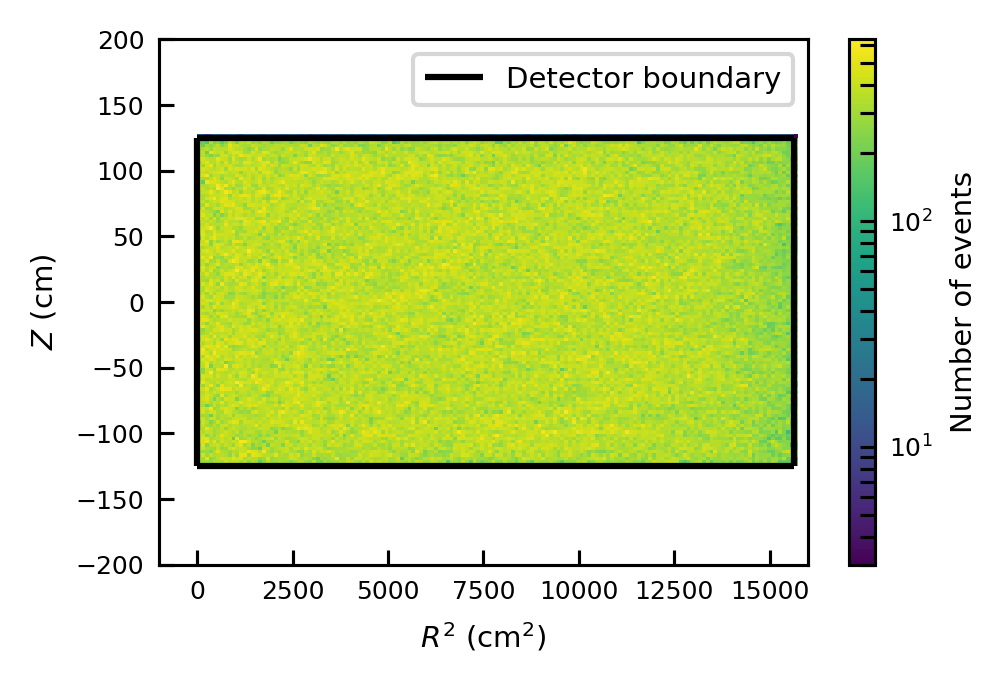

In [44]:
xpl=np.divide(np.concatenate(df.xp).tolist(),10)
ypl=np.divide(np.concatenate(df.yp).tolist(),10)
zpl=np.divide(np.concatenate(df.zp).tolist(),10)

plt.hist2d(np.power(xpl,2)+np.power(ypl,2), zpl, bins=(170,160), range=((-1000,16000),(-200,200)), norm=colors.LogNorm(), label='Location of energy depositions')
plt.colorbar(label='Number of events')

zhalf=250/2
rsquare=(250/2)**2

plt.vlines(0,-zhalf,zhalf, label='Detector boundary')
plt.vlines(rsquare,-zhalf,zhalf)
plt.hlines(-zhalf,0,rsquare)
plt.hlines(zhalf,0,rsquare)
plt.xlabel('$R^2$ (cm$^2$)')
plt.ylabel('$Z$ (cm)')
plt.legend()
plt.draw()
plt.show()

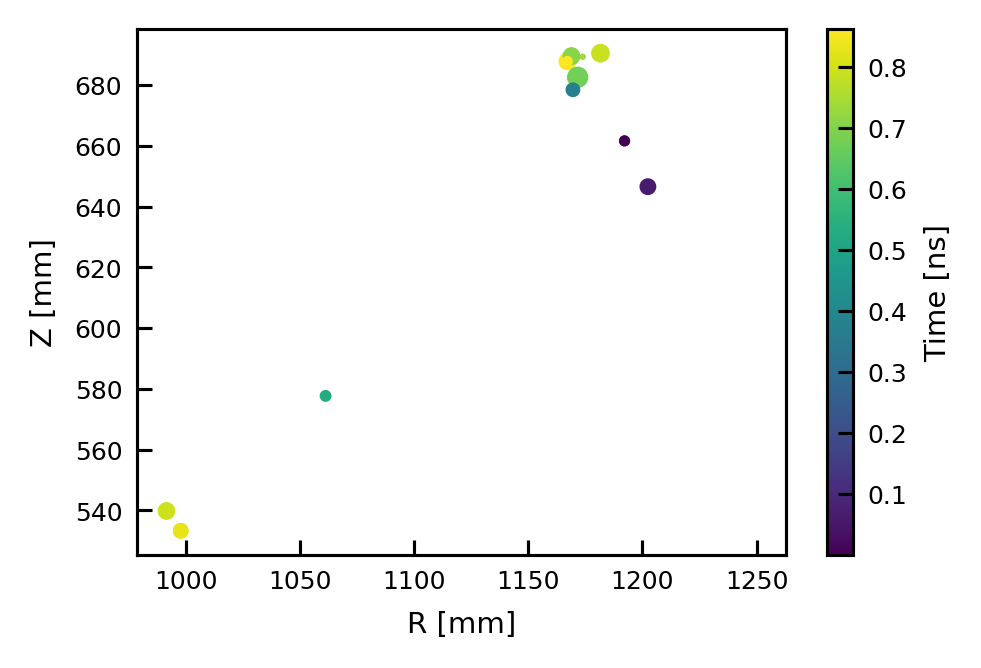

In [38]:
eventid=2

plt.scatter((np.sqrt(df.xp[eventid]**2+df.yp[eventid]**2)), df.zp[eventid], c=df.time[eventid]*1e9, s=df.ed[eventid]/10)
plt.colorbar(label='Time [ns]')
plt.xlabel('R [mm]')
plt.ylabel('Z [mm]')
plt.draw()
plt.show()

In [39]:
esum_late=0
for pair in zip(np.array(df.iloc[eventid]['time']),np.array(df.iloc[eventid]['ed'])):
    if pair[0] > 0.02e-9:
        esum_late+=pair[1]
        
print(esum_late)

esum_early=0
for pair in zip(np.array(df.iloc[eventid]['time']),np.array(df.iloc[eventid]['ed'])):
    if pair[0] < 0.02e-9:
        esum_early+=pair[1]
        
print(esum_early)

print(esum_early+esum_late)

2211.4211937375367
64.32997941970825
2275.751173157245


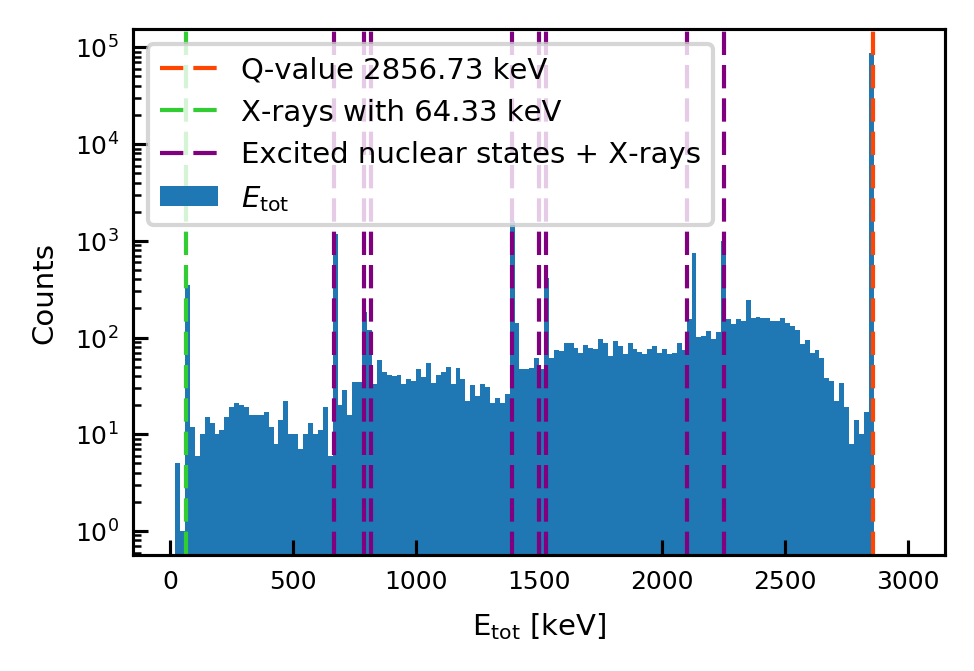

In [40]:
plt.hist(df.etot,range=(0,3000),bins=150, label='$E_{\\rm{tot}}$')
plt.xlabel('E$_{\\rm{tot}}$ [keV]')
plt.ylabel('Counts')
plt.axvline(2856.73, linestyle='--', color='orangered', linewidth=1, label='Q-value 2856.73 keV')
plt.axvline(64.33, linestyle='--', color='limegreen', linewidth=1, label='X-rays with 64.33 keV')
plt.axvline(2188+64.33, linestyle='--', color='purple', linewidth=1, label='Excited nuclear states + X-rays')
plt.axvline(603+64.33, linestyle='--', color='purple', linewidth=1)
plt.axvline(1465+64.33, linestyle='--', color='purple', linewidth=1)
plt.axvline(723+64.33, linestyle='--', color='purple', linewidth=1)
plt.axvline(1326+64.33, linestyle='--', color='purple', linewidth=1)
plt.axvline(752+64.33, linestyle='--', color='purple', linewidth=1)
plt.axvline(1437+64.33, linestyle='--', color='purple', linewidth=1)
plt.axvline(2039+64.33, linestyle='--', color='purple', linewidth=1)

plt.yscale('log')

plt.legend(frameon=True, loc='upper left')
plt.draw()
plt.savefig(_decayname+'_etot.pdf', transparent=True, bbox_inches='tight')
plt.show()

In [41]:
for pair in zip(df.trackid[eventid], df.type[eventid], df.parentid[eventid]):
    print(pair)

(5, b'gamma', 0)
(5, b'gamma', 0)
(5, b'gamma', 0)
(8, b'e-', 5)
(8, b'e-', 5)
(8, b'e-', 5)
(8, b'e-', 5)
(7, b'e-', 5)
(7, b'e-', 5)
(7, b'e-', 5)
(7, b'e-', 5)
(7, b'e-', 5)
(6, b'e-', 5)
(6, b'e-', 5)
(10, b'gamma', 7)
(9, b'gamma', 5)
(4, b'gamma', 0)
(4, b'gamma', 0)
(3, b'gamma', 0)
(3, b'gamma', 0)
(3, b'gamma', 0)
(3, b'gamma', 0)
(3, b'gamma', 0)
(3, b'gamma', 0)
(3, b'gamma', 0)
(2, b'gamma', 0)
(1, b'gamma', 0)
(22, b'e-', 1)
(22, b'e-', 1)
(21, b'e-', 2)
(21, b'e-', 2)
(19, b'e-', 3)
(19, b'e-', 3)
(19, b'e-', 3)
(18, b'e-', 3)
(18, b'e-', 3)
(18, b'e-', 3)
(17, b'e-', 3)
(17, b'e-', 3)
(16, b'e-', 3)
(16, b'e-', 3)
(16, b'e-', 3)
(16, b'e-', 3)
(16, b'e-', 3)
(15, b'e-', 3)
(15, b'e-', 3)
(15, b'e-', 3)
(15, b'e-', 3)
(15, b'e-', 3)
(15, b'e-', 3)
(15, b'e-', 3)
(15, b'e-', 3)
(14, b'e-', 3)
(14, b'e-', 3)
(13, b'e-', 4)
(13, b'e-', 4)
(13, b'e-', 4)
(12, b'e-', 9)
(12, b'e-', 9)
(11, b'e-', 10)
(11, b'e-', 10)
(20, b'gamma', 3)
(23, b'e-', 20)
(23, b'e-', 20)
